<a href="https://colab.research.google.com/github/veeralipi22/05-clustering-DBSCAN/blob/main/Assignment_07_DBSCAN_Clustering_Crimes_(N).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [ ]:
# Import Dataset
crime=pd.read_csv('crime_data.csv')
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [ ]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [ ]:
crime.drop(['Unnamed: 0'],axis=1,inplace=True)
crime

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [ ]:
# Normalize heterogenous numerical data using standard scalar fit transform to dataset
crime_norm=StandardScaler().fit_transform(crime)
crime_norm

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [ ]:
# DBSCAN Clustering
dbscan=DBSCAN(eps=1,min_samples=4)
dbscan.fit(crime_norm)

DBSCAN(eps=1, min_samples=4)

In [ ]:
#Noisy samples are given the label -1.
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1])

In [ ]:
# Adding clusters to dataset
crime['clusters']=dbscan.labels_
crime

,Murder,Assault,UrbanPop,Rape,clusters
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1


In [ ]:
crime.groupby('clusters').agg(['mean']).reset_index()


,clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,11.005556,247.166667,70.666667,28.766667
1,0,14.050000,238.000000,57.750000,23.200000
2,1,4.825000,112.035714,63.357143,16.107143


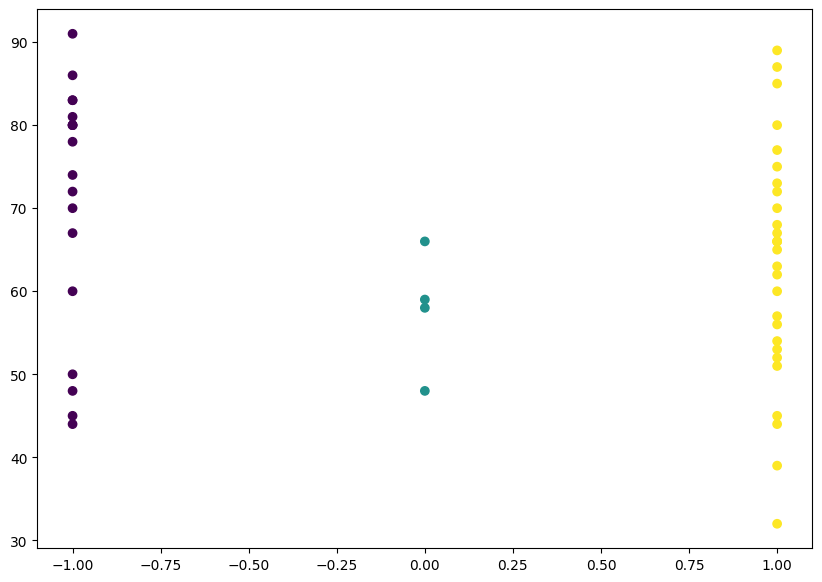

In [ ]:
# Plot Clusters
plt.figure(figsize=(10, 7))
plt.scatter(crime['clusters'],crime['UrbanPop'], c=dbscan.labels_)

In [ ]:
crime.head()

,Murder,Assault,UrbanPop,Rape,clusters
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1


**Heirrarchical Clustering**

In [ ]:
#Standardize the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler
df1= crime.drop(['clusters'], axis=1)
standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(df1)
std_df.shape

(50, 4)

In [ ]:
minmax = MinMaxScaler()

minmax_df = minmax.fit_transform(df1)
minmax_df.shape

(50, 4)

In [ ]:
import scipy.cluster.hierarchy as sch


single

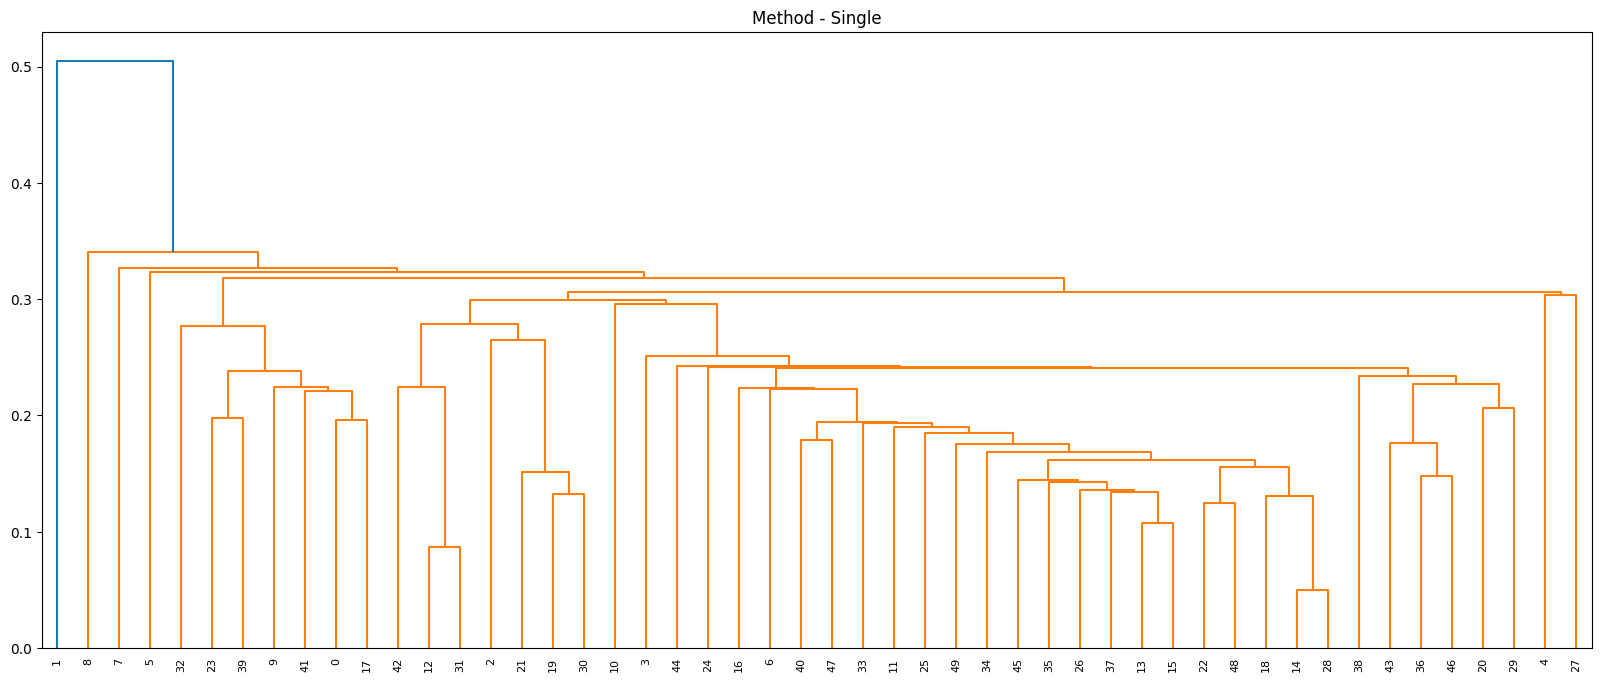

In [ ]:
#create dendrogram
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(minmax_df, method='single'))
plt.title("Method - Single")
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering


In [ ]:
#creating clusters method - single
hc_s = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage= 'single')


In [ ]:
y_hc = hc_s.fit_predict(minmax_df)
Clusters_s = pd.DataFrame(y_hc, columns=['Cluster'])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
Clusters_s.head()

,Cluster
0,0
1,1
2,0
3,0
4,0


In [ ]:
Clusters_s.value_counts()


Cluster
0          48
1           1
2           1
dtype: int64

In [ ]:
crime['h_clusterid'] = Clusters_s

In [ ]:
crime.head()

,Murder,Assault,UrbanPop,Rape,clusters,h_clusterid
0,13.2,236,58,21.2,0,0
1,10.0,263,48,44.5,-1,1
2,8.1,294,80,31.0,-1,0
3,8.8,190,50,19.5,-1,0
4,9.0,276,91,40.6,-1,0


In [ ]:
crime.groupby('h_clusterid').agg(['mean']).reset_index()


,h_clusterid,Murder,Assault,UrbanPop,Rape,clusters
,,mean,mean,mean,mean,mean
0,0,7.583333,165.416667,65.604167,20.525,0.25
1,1,10.000000,263.000000,48.000000,44.500,-1.00
2,2,15.400000,335.000000,80.000000,31.900,-1.00


Here we can say that states in cluster index 0 are a safer than other 2 clusters, but as we can check in dendrogram in cluster 1 and cluster 2 only 2 states are available which does not give us a valid clarification.



average

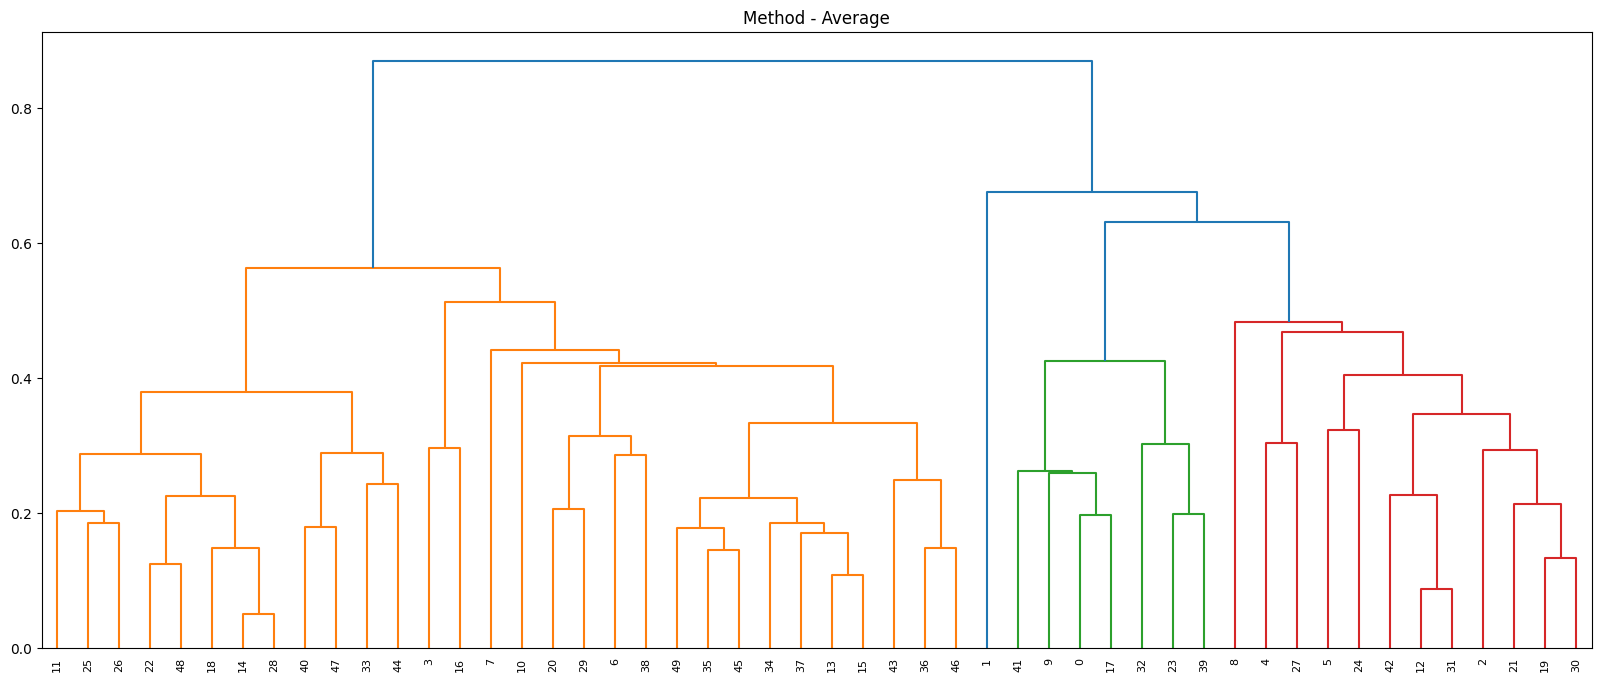

In [ ]:
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(minmax_df, method='average'))
plt.title("Method - Average")
plt.show()

In [ ]:
#create clusters using method - average
hc_a = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage= 'average')

In [ ]:
y_hc = hc_a.fit_predict(minmax_df)
Clusters_a = pd.DataFrame(y_hc, columns=['Clusters'])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
Clusters_a.head()

,Clusters
0,0
1,0
2,0
3,1
4,0


In [ ]:
crime['h_clusterid'] = Clusters_a
Clusters_a.value_counts()

Clusters
1           30
0           20
dtype: int64

In [ ]:
crime.head()

,Murder,Assault,UrbanPop,Rape,clusters,h_clusterid
0,13.2,236,58,21.2,0,0
1,10.0,263,48,44.5,-1,0
2,8.1,294,80,31.0,-1,0
3,8.8,190,50,19.5,-1,1
4,9.0,276,91,40.6,-1,0


In [ ]:
crime.groupby('h_clusterid').agg(['mean']).reset_index()


,h_clusterid,Murder,Assault,UrbanPop,Rape,clusters
,,mean,mean,mean,mean,mean
0,0,12.165,255.250000,68.400000,29.165000,-0.7
1,1,4.870,114.433333,63.633333,15.943333,0.8


1)Here we can conclude cluster index 1 states are more safer than cluster index 0 states.

2)Cluster index 1 has comparitively less urban population than cluster index 0.

3)Cluster index 1 has 30 states and cluster index 0 has 20 states.

4)So we can say the urban population is affecting the rate of crimes. More the urban population more the crime.

complete

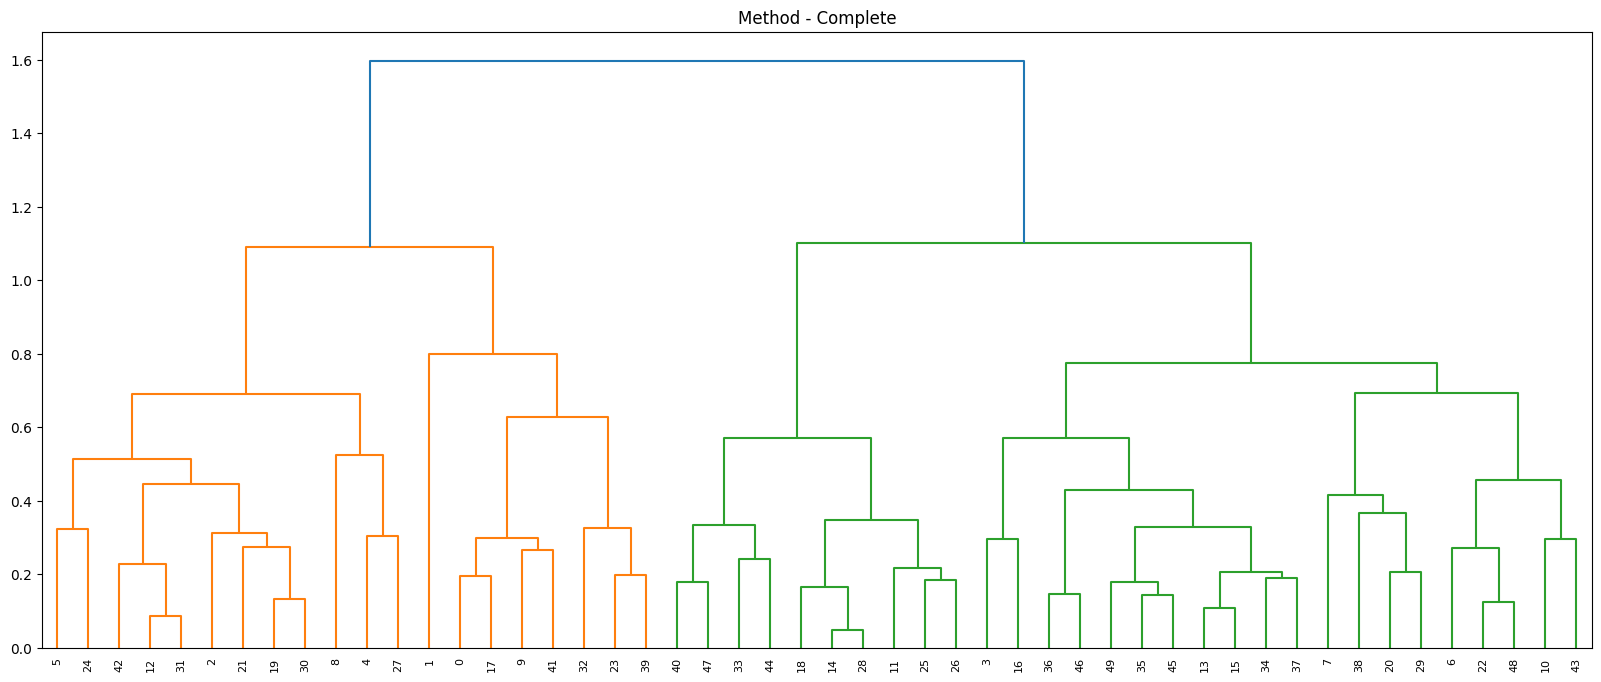

In [ ]:
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(minmax_df, method='complete'))
plt.title("Method - Complete")
plt.show()

In [ ]:
#create clusters using method - complete
hc_c = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage= 'complete')

In [ ]:
y_hc = hc_c.fit_predict(minmax_df)
Clusters_c = pd.DataFrame(y_hc, columns=['Clusters'])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
Clusters_c

,Clusters
0,1
1,1
2,1
3,0
4,1
5,1
6,0
7,0
8,1
9,1


In [ ]:
crime['h_clusterid'] = Clusters_c
Clusters_c.value_counts()

Clusters
0           30
1           20
dtype: int64

In [ ]:
crime.head()

,Murder,Assault,UrbanPop,Rape,clusters,h_clusterid
0,13.2,236,58,21.2,0,1
1,10.0,263,48,44.5,-1,1
2,8.1,294,80,31.0,-1,1
3,8.8,190,50,19.5,-1,0
4,9.0,276,91,40.6,-1,1


In [ ]:
crime.groupby('h_clusterid').agg(['mean']).reset_index()


,h_clusterid,Murder,Assault,UrbanPop,Rape,clusters
,,mean,mean,mean,mean,mean
0,0,4.870,114.433333,63.633333,15.943333,0.8
1,1,12.165,255.250000,68.400000,29.165000,-0.7


Results are almost similar to Average method.

**K-Means CLustering**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

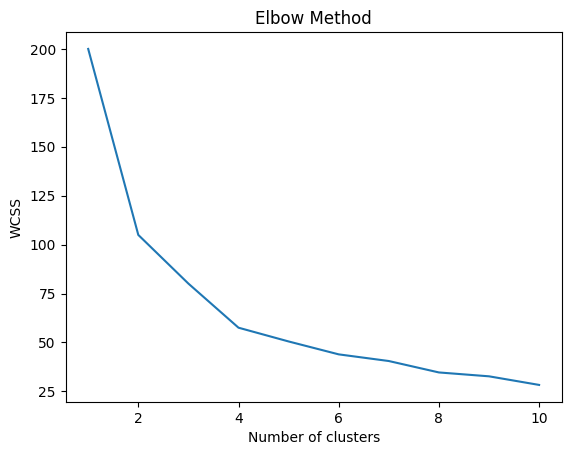

In [ ]:
#How to find optimum number of clusters
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, random_state = 0)
  kmeans.fit(std_df)
  wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

To choose any k value between 4-8 would be suitable. But we will go with the lowest 4.



In [ ]:
from pandas.core.common import random_state
clusters_new = KMeans(4, random_state=32)
clusters_new.fit(std_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=32)

In [ ]:
clusters_new.labels_

array([2, 0, 0, 2, 0, 0, 3, 3, 0, 2, 3, 1, 0, 3, 1, 3, 1, 2, 1, 0, 3, 0,
       1, 2, 0, 1, 1, 0, 1, 3, 0, 0, 2, 1, 3, 3, 3, 3, 3, 2, 1, 2, 0, 3,
       1, 3, 3, 1, 1, 3], dtype=int32)

In [ ]:
df1['h_clusterid'] = clusters_new.labels_

In [ ]:
df1.head()

,Murder,Assault,UrbanPop,Rape,h_clusterid
0,13.2,236,58,21.2,2
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,2
4,9.0,276,91,40.6,0


In [ ]:
df1.groupby('h_clusterid').agg(['mean']).reset_index()

,h_clusterid,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,10.815385,257.384615,76.000000,33.192308
1,1,3.600000,78.538462,52.076923,12.176923
2,2,13.937500,243.625000,53.750000,21.412500
3,3,5.656250,138.875000,73.875000,18.781250


1)Here we can conclude that states in cluster 1 are safer than other 3 clusters.

2)Also the urban population in cluster 1 states is less compared to other clusters.

3)Here also we can conclude that the urban population is affecting the rate of crime. As we can check in cluster 1, the urban population is the lowest and also the crimes are lowest in comparison to other 3 cluster of states.

**DBSCAN**

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
df_d=pd.read_csv('crime_data.csv')


In [ ]:
dbscan = DBSCAN(eps = 1.25, min_samples=3)
dbscan.fit(std_df)

DBSCAN(eps=1.25, min_samples=3)

In [ ]:
DBSCAN(eps=1.25, min_samples=3)

DBSCAN(eps=1.25, min_samples=3)

In [ ]:
#Noisy points are given by the label -1
dbscan.labels_

array([ 0, -1,  1,  1, -1,  1,  1,  1, -1,  0,  1,  1,  1,  1,  1,  1,  1,
        0,  1,  1,  1,  1,  1,  0,  1,  1,  1, -1,  1,  1,  1,  1,  0,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1])

In [ ]:
cl = pd.DataFrame(dbscan.labels_, columns=['clusters'])


In [ ]:
cl.head()

,clusters
0,0
1,-1
2,1
3,1
4,-1


In [ ]:
df_d=pd.concat([df_d,cl], axis=1)
df_d.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusters
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,-1


In [ ]:
df_d['clusters'].value_counts()


 1    39
 0     7
-1     4
Name: clusters, dtype: int64

In [ ]:
#clusters by DBSCAN
df_d.groupby('clusters').agg(['mean']).reset_index()


<ipython-input-61-d2ba93c0ad8d>:2: FutureWarning: ['Unnamed: 0'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_d.groupby('clusters').agg(['mean']).reset_index()


,clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,11.650000,281.500000,75.000000,40.750000
1,0,14.671429,251.285714,54.285714,21.685714
2,1,6.156410,144.948718,66.589744,19.148718


From DBSCAN we can check for outliers. And after trial and errors on min-samples and eps value, we chose eps = 1.25 and min_samples = 3.

We got 4 states in outliers.

And the clusters 0 & 1 each having 7 & 39 states respectively.

We can conlcude from here that cluster 1 states are safer than cluster 0.